**Group 7 (Section 009)**
=

*delete this cell before handing in*

maximum of **2000 words** (excluding citations) using Jupyter. 
The report should include the posed question, conducted analysis, and derived conclusion.
It is not required to include all tasks completed by every group member in their individual assignments; tailor the final report to the collective group's work. 
Make sure to reach a consensus among all team members on the final content of the report.

**Due date: Saturday December 6, 11:59 PM**

**Title: Predicting Subscription Status in Minecraft: The Roles of Age and Playtime** 
=

**Introduction:**
-

provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- **Background information:** Frank Wood, an associate professor of computer science at UBC, is leading a research group in learning about players' actions in a MineCraft server that they have created. 


clearly state the question you tried to answer with your project
- One question they asked was: **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**
- Our group is interested in answering a related question: **...**


identify and fully describe the dataset that was used to answer the question

**Dataset description:**
- We will be using the players.csv dataset.
- There are 196 observations in this dataset.
- The dataset contains the following variables: **experience** (one of Amateur, Regular, Pro, Veteran), **subscribe** (whether or not a player subsribes to the newsletter), **hashedEmail** (player email), **played_hours** (hours player spent on the MineCraft server), **name** (player name), **gender** (one of Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say), **Age** (player age).
- We will be focusing on the following variables for our analysis: ...

**Methods & Results:**
-
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
your report should include code which:
- loads data 
- wrangles and cleans the data to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
    - "perform a summary"? summary(players_clean)?
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - exploratory graphs without doing workflow, fitting?
- performs the data analysis
- creates a visualization of the analysis 
- note: all figures should have a figure number and a legend

In [1]:
# Loading the dataset
library(tidyverse)

url_players = "https://raw.githubusercontent.com/ilin27/project_planning_stage_individual/refs/heads/main/players.csv"
download.file(url_players, "players.csv")
players <- read_csv("players.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
# Wrangling and cleaning the data

In [3]:
players <- players %>% select(-experience, -hashedEmail, -name, -gender) |>
  mutate(
    subscribe = as.factor(subscribe),     
    played_hours = as.numeric(played_hours),  
    Age = as.numeric(Age)                 
  )

In [4]:
players <- players %>% 
  rename(
    "Hours Played" = played_hours,
    "Subscription Status" = subscribe
  )
players

Subscription Status,Hours Played,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,47


The quantitative variables "Age" and "played_hours" will be used to predict a  the qualitaitve variable, gamers subscription status as one of the two categories: "TRUE" or "FALSE", using knn classification. Therefore the dataframe above should be simplified to only include the two predictor variables and the reponse variable in question. 

In [5]:
summary(players)

 Subscription Status  Hours Played          Age       
 FALSE: 52           Min.   :  0.000   Min.   : 9.00  
 TRUE :144           1st Qu.:  0.000   1st Qu.:17.00  
                     Median :  0.100   Median :19.00  
                     Mean   :  5.846   Mean   :21.14  
                     3rd Qu.:  0.600   3rd Qu.:22.75  
                     Max.   :223.100   Max.   :58.00  
                                       NA's   :2      

0.7
1.9


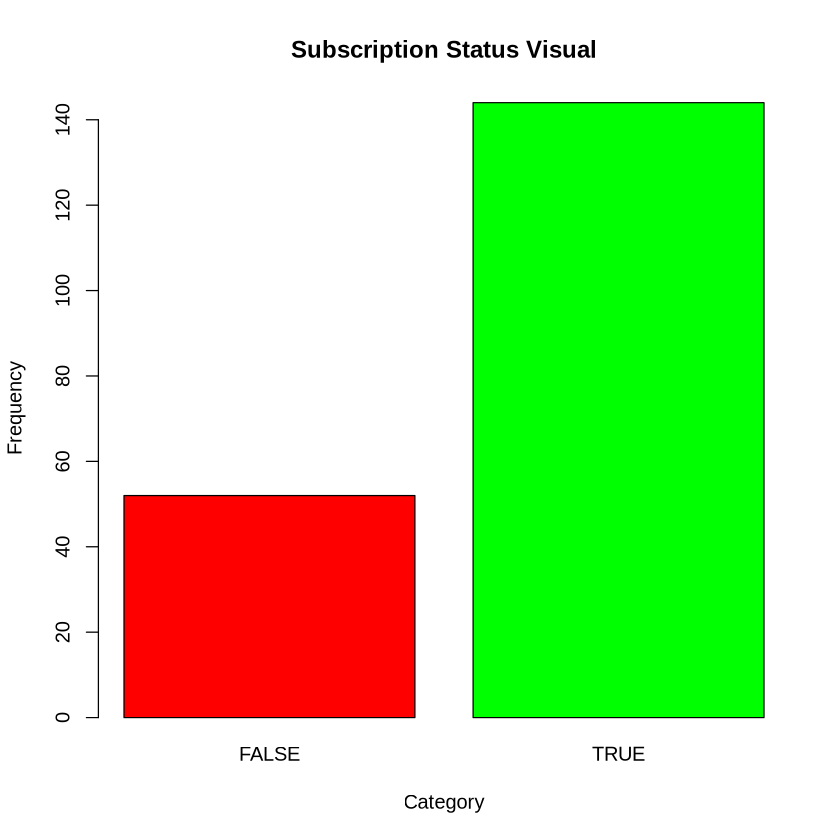

In [12]:
counts <- table(players$'Subscription Status')
bar_colors <- c("red", "green")


subscription_status_visual <- barplot(
  counts,
  main = "Subscription Status Visual",
  xlab = "Category",
  ylab = "Frequency",
  col = bar_colors,
  ylim = c(0, max(counts) + 1)
)
subscription_status_visual

In [9]:
range(players$`Hours Played`, na.rm = TRUE)


[1]   0.0 223.1

$breaks
  [1]   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 [19]  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
 [37]  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
 [55]  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
 [73]  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
 [91]  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
[109] 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
[127] 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
[145] 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
[163] 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
[181] 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
[199] 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
[217] 216 217 218 219 220 221 222 223 224

$counts
  [1]

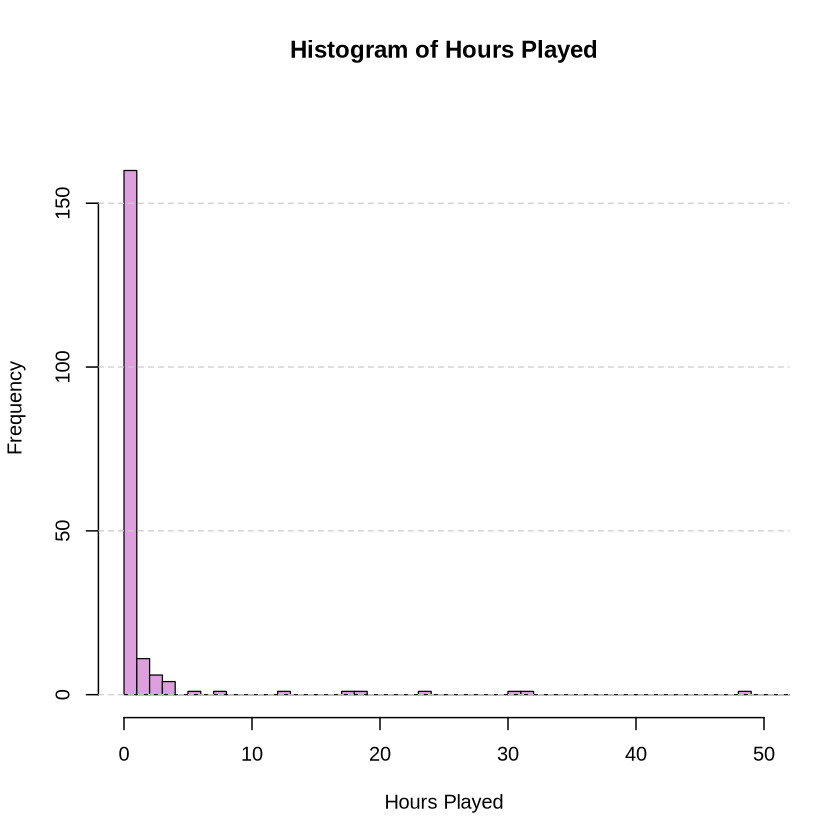

In [26]:
hours_played_visual <- hist(
  players$`Hours Played`,
  breaks = seq(0, 224, by = 1),   
  main = "Histogram of Hours Played",
  xlab = "Hours Played",
  ylab = "Frequency",
  col = "plum",
  border = "black",
  lwd = 1.2,
  xlim = c(0, 50),                
  ylim = c(0, 175)                 
)


abline(h = seq(0, 300, 50), col = "gray80", lty = 2)


hours_played_visual

Most of the observations in the Histogram of Hours Played are in the first four bins that each have a one hour range between bins. The histogram below was created to zoom in on where the majority of the observations lie for a different perspective. 

$breaks
 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
[20] 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7
[39] 3.8 3.9 4.0

$counts
 [1] 119  10   5   5   4   5   3   2   1   6   1   2   0   1   2   1   1   2   0
[20]   1   1   1   1   0   0   0   2   0   1   0   0   0   0   0   1   1   0   1
[39]   0   1

$density
 [1] 6.57458564 0.55248619 0.27624309 0.27624309 0.22099448 0.27624309
 [7] 0.16574586 0.11049724 0.05524862 0.33149171 0.05524862 0.11049724
[13] 0.00000000 0.05524862 0.11049724 0.05524862 0.05524862 0.11049724
[19] 0.00000000 0.05524862 0.05524862 0.05524862 0.05524862 0.00000000
[25] 0.00000000 0.00000000 0.11049724 0.00000000 0.05524862 0.00000000
[31] 0.00000000 0.00000000 0.00000000 0.00000000 0.05524862 0.05524862
[37] 0.00000000 0.05524862 0.00000000 0.05524862

$mids
 [1] 0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35 1.45
[16] 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.

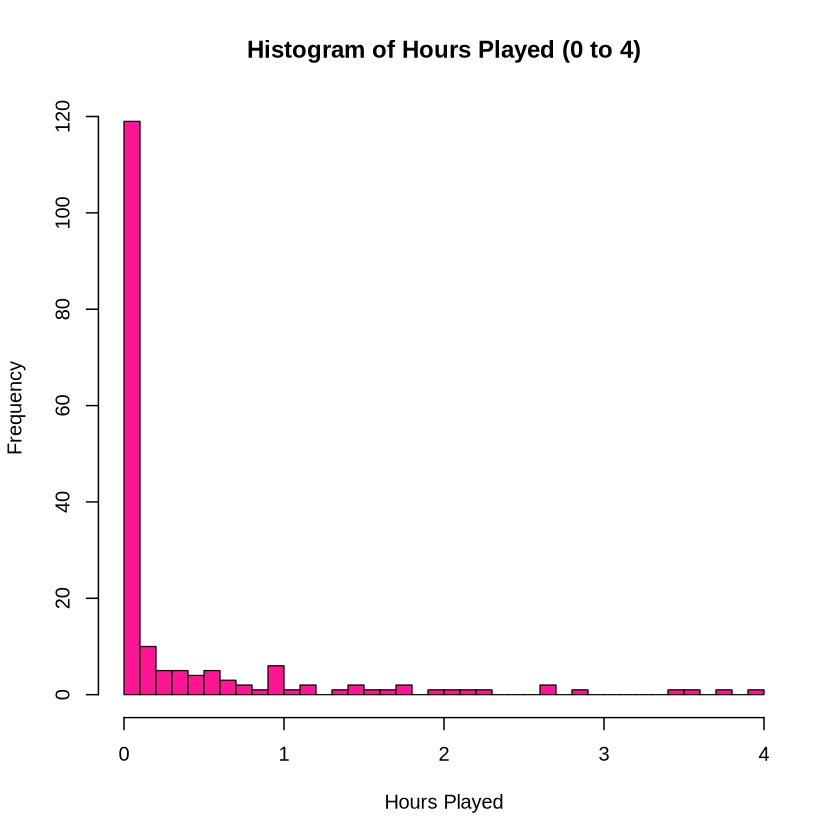

In [27]:
zoom_in_data_filter <- players$`Hours Played`[
  players$`Hours Played` >= 0 &
  players$`Hours Played` <= 4
]


histogram_zoomed <- hist(
  zoom_in_data_filter,
  breaks = seq(0, 4, by = 0.1),
  main = "Histogram of Hours Played (0 to 4)",
  xlab = "Hours Played",
  ylab = "Frequency",
  col = "deeppink",
  border = "black",
  lwd = 1.2,
  xlim = c(0, 4)
)
histogram_zoomed

17.0,10
17.0,17
21.0,19
24.5,22
33.0,28
19.3567,18.33705
22.6433,19.66295


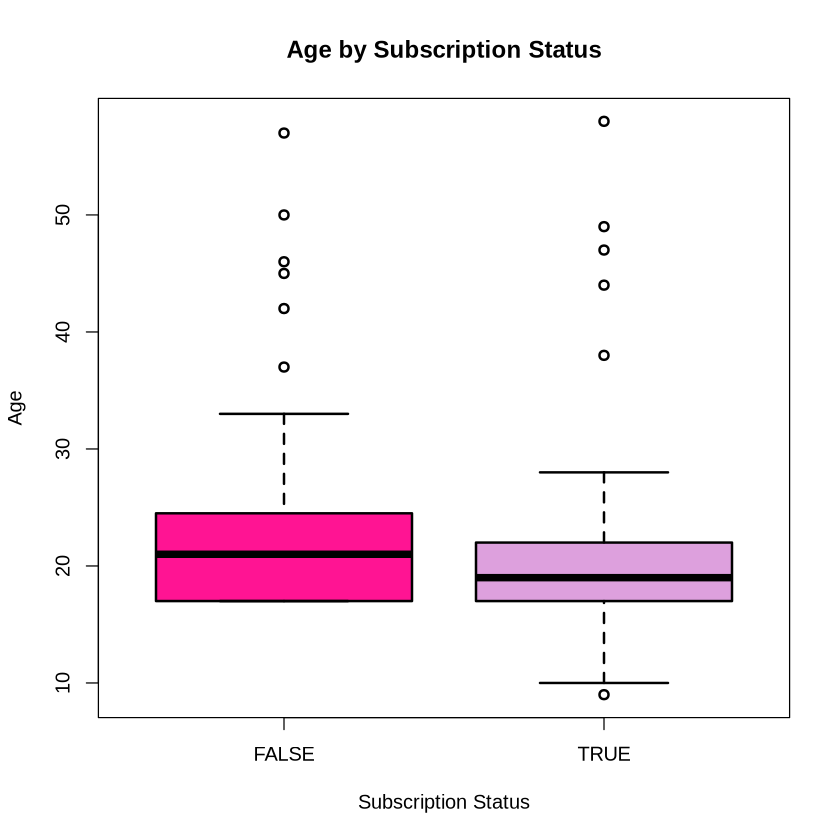

In [28]:
box_plot_age_sub <- boxplot(
  players$Age ~ players$`Subscription Status`,
  main = "Age by Subscription Status",
  xlab = "Subscription Status",
  ylab = "Age",
  col = c("deeppink", "plum"),   
  border = "black",
  lwd = 2
)
box_plot_age_sub

**Discussion:**
-
- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

**References**
-
- You may include references if necessary, as long as they all have a consistent citation style.
- Hint: use your proposal as a basis for your final report!